# Introduction

In this notebook we will be classifying handwritten digits. The MNIST dataset of handwritten digits contains 70,000. This is a well-known dataset in data science. Many classification models will be able to perform well on this dataset (achieving 90% or higher accuracy) without playing with the data at all. 

The goal of this notebook will be to see if we can improve upon the available modeling strategies by better understanding the data's distribution and augmenting the data given.

# Imports

In [1]:
import plotly as py
#import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn import svm




%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/digits-output-v4/xgb_10_eta_01
/kaggle/input/digits-output-v4/xgb_10_eta_03
/kaggle/input/digits-output-v1/aug_xgb_clf.pkl
/kaggle/input/digits-output-v1/baseline_rf_clf.pkl
/kaggle/input/digits-output-v1/baseline_svc.pkl
/kaggle/input/digits-output-v1/baseline_xgb_clf.pkl
/kaggle/input/digits-output-v1/baseline_K_nei.pkl
/kaggle/input/digits-output-v1/bin_xgb_clf.pkl
/kaggle/input/digits-output-v2/joblib_baseline_svc.sav
/kaggle/input/digits-output-v2/joblib_baseline_K_nei(1).sav
/kaggle/input/digits-output-v3/model_gs_6_deep.pkl
/kaggle/input/digits-output-v5/model_l2_reg.pkl
/kaggle/input/digits-output-v5/model_l1_reg.pkl
/kaggle/input/digits-output-v5/l2_results.pkl
/kaggle/input/digits-output-v5/model_no_reg.pkl
/kaggle/input/digits-output-v5/results.pkl
/kaggle/input/digits-output-v5/l1_results.pkl
/kaggle/working/__notebook__.ipynb


In [2]:
np.random.seed(42)

# Load the Data

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

Here we can see what our data looks like.

In [5]:
X[0].reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

Here's what the data represents.

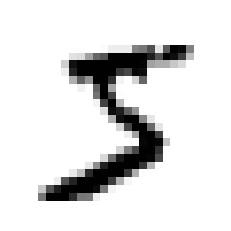

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

**Split train/validation set from test set**

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [8]:
#split training set from test set
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [9]:
X_train.shape

(56000, 784)

In [10]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 784)
(56000,)
(14000,)


# Baseline

Here we will use a few different types of models to see what level of accuracy digits can be classified before working with the data.

In [11]:
filename = '/kaggle/input/digits-output-v1/baseline_rf_clf.pkl'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)
    pickle.dump(rf_clf, open(filename, 'wb'))
    preds = rf_clf.predict(X_val)
    pass

accuracy = accuracy_score(y_val, preds)
accuracy


0.9672857142857143

The random forest classifier achieves 96.78% accuracy right out of the box!

In [12]:
filename = '/kaggle/input/digits-output-v2/joblib_baseline_svc.sav'
try:
    loaded_model = joblib.load(filename)
    preds = loaded_model.predict(X_val)
    pass
except:
    svc = svm.SVC()
    svc.fit(X_train, y_train)
    joblib.dump(svc, filename)
    preds = svc.predict(X_val)
    pass

accuracy = accuracy_score(y_val, preds)
accuracy

0.9764285714285714

Classifying with a support vector machine yields 97.64% accuracy right off the bat.

In [13]:
K_nei = KNeighborsClassifier()
filename = '/kaggle/input/digits-output-v2/joblib_baseline_K_nei(1).sav'
try:
    loaded_model = joblib.load(filename)
    preds = loaded_model.predict(X_val)
    pass
except:
    K_nei.fit(X_train, y_train)
    joblib.dump(K_nei, filename)
    preds = K_nei.predict(X_val)
    pass

accuracy = accuracy_score(y_val, preds)
accuracy

0.9700714285714286

The K-Nearest Neighbors classifier acheives 97.01% accuracy with out any fine tuning.

In [14]:
filename = '/kaggle/input/digits-output-v1/baseline_xgb_clf.pkl'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    preds = xgb_clf.predict(X_val)
    pass
accuracy = accuracy_score(y_val, preds)
accuracy

0.9780714285714286

XGboost achieves 97.81% accuracy right out of the box.

So, as we can see from all of these common models, a high accuracy result is standard; even without fine-tuning our models. Lets see what insights gained by looking more closely at the data.

# Data Exploration

To aid in data exploration we will convert our training data into a data frame.

In [15]:
train_df = pd.DataFrame(data = X_train)
train_df['Label'] = y_train

In [16]:
train_df.Label.value_counts().sort_index()

0    5560
1    6277
2    5610
3    5708
4    5529
5    5040
6    5480
7    5790
8    5468
9    5538
Name: Label, dtype: int64

In [17]:
px.bar(train_df.Label.value_counts().sort_index())

It looks like the representation of each class in the data is fairly even. As the number 5 was written about 1,000 fewer times, our prediction model may tend to not predict 5s as they are not as common in the data. 

To compensate for this over-representation we can make sure there is an even amount of each digit represented in our training set.

In [18]:
#creating a data frame with all of the pixels related to their 2D
#representation and their label value
train_df = pd.DataFrame(data = X_train)
new_axis_1 = [train_df.columns%28 for i in range(X_train.shape[0])]
new_axis_2 = [train_df.columns//28 for i in range(X_train.shape[0])]
new_pixel = [X_train[i] for i in range(X_train.shape[0])]
Labels = [y_train[i//X_train.shape[1]] for i in range(X_train.shape[0] * X_train.shape[1])]
graph_dict = {'axis_1':np.ravel(new_axis_1), 'axis_2':np.flipud(np.ravel(new_axis_2)), 
              'pixel': np.ravel(new_pixel), 'Labels':Labels}
graph_df=pd.DataFrame(graph_dict)

**Distributions:**
Notice the distribution of pixel values across all digits.

As you can see the majority of pixels are 0 in darkness value (all the way white).

In [19]:
fig = px.histogram(graph_df.pixel.value_counts().sort_index(), x=graph_df.pixel.value_counts().sort_index().index, 
                   y=graph_df.pixel.value_counts().sort_index().values, range_y=[0, 30000000],
                   labels = {'pixel':'Pixel Darkness'},
                  title='Distribution of All Pixel Values',
                  color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Darkness Value', yaxis_title='Frequency')
fig

But when we take out the pixels with value of 0, we see that pixels in the range of 240-255 in darkness (very close to absolutely black) have the greatest frequency of occurence.

In [20]:
fig = px.histogram(graph_df.pixel.value_counts().sort_index()[1:], x=graph_df.pixel.value_counts().sort_index().index[1:], 
                   y=graph_df.pixel.value_counts().sort_index().values[1:], range_y=[0, 3000000],
                   labels = {'pixel':'Pixel Darkness'},
                  title='Distribution of Pixel Values Not Including 0',
                  color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Darkness Value', yaxis_title='Frequency')
fig

This distribution heavily skewed to the right.

To account for the majority of non-zero pixels having a high darkness value, we may either make all non-zero pixels equal 255, or scale our pixel darkness values so that they follow a normal distribution.

**Analyzing Non-zero Pixel Overlap Between Digits:**
Below you can see the first 10,000 pixels of the hand-written digit examples plotted in 2D. As you can see there is a lot of overlap and often one digit can inhabit the same non-zero 2D space as another digit. 

This tells me that defining the strong weights for each non-zero pixel will not be enough (it will not be enough to just say that this pixel is used by 3 but not by 9, because often they use the same pixels).

In [21]:
px.scatter(graph_df[:10000], x='axis_1', y='axis_2', color='Labels',
          size='pixel', hover_data=['Labels'])

Further, as you can see below, even with the darkness (pixel value) of each pixel, there is still a lot of overlap. This too will not be enough to define the difference between various digits.

In [22]:
fig = px.scatter_3d(graph_df[:10000], x='axis_1', y='axis_2',
                   z='pixel', color='Labels', opacity=0.7)
fig

In [23]:
#creating a data frame based on the main graph data frame just for digit 4 
fours_df = graph_df[graph_df.Labels=='4']
fours_df

axis_1  axis_2  pixel Labels
784            0      27    0.0      4
785            1      27    0.0      4
786            2      27    0.0      4
787            3      27    0.0      4
788            4      27    0.0      4
...          ...     ...    ...    ...
43885963      23       0    0.0      4
43885964      24       0    0.0      4
43885965      25       0    0.0      4
43885966      26       0    0.0      4
43885967      27       0    0.0      4

[4334736 rows x 4 columns]

As you can see in the 2D plot below there is a lot of spread in the non-zero pixel space even for just one digit. That means there are not strong boundaries for any given digit. 

In [24]:
px.scatter(fours_df[:10000], x='axis_1', y='axis_2', color='Labels',
          size='pixel', hover_data=['Labels'])

In the 3D plot below you can see the pixel values just for digit 4. As you can tell, the darkness (pixel value) even for just this one digit is all over the place and does not have well defined boundaries.

The darkness (pixel value) of a given pixel will not be a great definition for what makes a given digit either.

In [25]:
fig = px.scatter_3d(fours_df[:10000], x='axis_1', y='axis_2',
                   z='pixel', color='Labels', opacity=0.7)
fig

Probably, with all of that in mind, in order to consistently classify digits then, we will have to focus our attention on the correlation between pixels as opposed to the individual pixels themselves.

In [26]:
error_arr = y_val[y_val!=preds]
error_df = pd.DataFrame(error_arr)

In [27]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data=[go.Pie(labels=error_df.value_counts().sort_index().index,
                            values=error_df.value_counts().sort_index().values)])
fig
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                 textinfo='label+percent', 
                  pull=[0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0.1],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig

As you can see in the pie chart above, digits 3 and 9, as well as 7 and 8 are over-represented in the incorrect predictions. To correct for this, it may be good sample these digits more frequently in training to give our model a chance to fit these classes better.

In [28]:
log_X_train = np.log(X_train[np.where(X_train != 0.0)])

In [29]:
fig = px.histogram(log_X_train[:10000], nbins=6)
                #   .pixel.value_counts().sort_index()[1:], x=log_graph_df.pixel.value_counts().sort_index().index[1:], 
                #   y=log_graph_df.pixel.value_counts().sort_index().values[1:], range_y=[0, 3000000],
                #   labels = {'pixel':'Pixel Darkness'},
                #  title='Distribution of Pixel Values when Natural is Applied (Not Including 0)',
                #  color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Darkness Value', yaxis_title='Frequency')
fig

In [30]:
rob_scaler = RobustScaler()
std_X_train = rob_scaler.fit_transform(X_train)

Taking the log of the pixel darkness values, only makes the heavy right skew of the data more obvious.

In [31]:
np.unique(std_X_train)
fig = px.histogram(std_X_train.flatten()[:10000], nbins=6)
fig.update_layout(xaxis_title='Darkness Value', yaxis_title='Frequency')
fig

In trying to standardize our pixel darkness values (try to get them to follow a standard normal distribution), we still find a heavy over representation of 0 darkness values (white pixels). Likely, we will not be able to get rid of these as they hold significance in interpreting digits.

# Feature Engineering

Let's consider how eliminating variance in pixel darkness effects our model. Essentially what this means is that every pixel will be only 0 or 255, no in between. 

I think that this may help our model not to get too focused on pixel darkness, which ultimately doesn't lend that much useful information towards the shape of the digit. This may, however, take away key embedded information about edges of the hand-written digits.

In [32]:
bin_X_train = np.where(X_train !=0, 255, X_train)
bin_X_train.shape
bin_X_train.flatten().shape

(43904000,)

In [33]:
fig = px.histogram(bin_X_train.flatten()[:10000], nbins=6)
                #   .pixel.value_counts().sort_index()[1:], x=log_graph_df.pixel.value_counts().sort_index().index[1:], 
                #   y=log_graph_df.pixel.value_counts().sort_index().values[1:], range_y=[0, 3000000],
                #   labels = {'pixel':'Pixel Darkness'},
                #  title='Distribution of Pixel Values when Natural is Applied (Not Including 0)',
                #  color_discrete_sequence=['orange'])
fig.update_layout(xaxis_title='Darkness Value', yaxis_title='Frequency')
fig

As you can see in this graph, the only darkness values in this new version of our training data is 0 (white) and 255 (absolute black).

In [34]:
bin_X_val = np.where(X_val !=0, 255, X_val)

In [35]:
filename = '/kaggle/input/digits-output-v1/bin_xgb_clf.pkl'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier()
    xgb_clf.fit(bin_X_train, y_train)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    preds = xgb_clf.predict(bin_X_val)
    pass
accuracy = accuracy_score(y_val, preds)
accuracy

0.9477142857142857

With only binary pixel darkness values, our model predicted with a slightly worse level of accuracy (97.69% in comparison to the earlier 97.81%). 

Below we will try to create an augmented training set full of the same training examples, but with 4 copies with each of them shifted 4 pixels in each of the 4 directions (one copy that up, down, left, and right of each hand-written digit).

In [36]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for image, label in zip(X_train, y_train):
    X_train_augmented.append(np.roll(image.reshape(28,28), -1, axis=1).flatten())
    y_train_augmented.append(label)
    X_train_augmented.append(np.roll(image.reshape(28,28), 1, axis=1).flatten())
    y_train_augmented.append(label)
    X_train_augmented.append(np.roll(image.reshape(28,28), -1, axis=0).flatten())
    y_train_augmented.append(label)
    X_train_augmented.append(np.roll(image.reshape(28,28), 1, axis=0).flatten())
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [37]:
X_train_augmented.shape

(280000, 784)

In [38]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

Now that we have our augmented dataset, let's see if our XGBoost model can achieve higher accuracy by training on this larger dataset.

In [39]:
filename = '/kaggle/input/digits-output-v1/aug_xgb_clf.pkl'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train_augmented, y_train_augmented)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    preds = xgb_clf.predict(X_val)
    pass
accuracy = accuracy_score(y_val, preds)
accuracy

0.9828571428571429

We can tell from our augmented data that it performed significantly better at 98.29% accuracy. That is a .48% improvement!

# Modeling the Data

In [40]:
filename = '/kaggle/input/digits-output-v3/model_gs_6_deep.pkl'
try:
    gs = pickle.load(open(filename, 'rb'))
    pass
except:
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier()
    #trying to compare the scores of XGBoost with different parameters
    param_grid = [
        {'max_depth': [6], 'eta': [.3, .1]},
    ]
    
    gs = GridSearchCV(xgb_clf, param_grid, cv=3,
                               scoring='accuracy',
                               return_train_score=True)
    gs.fit(X_train_augmented, y_train_augmented)
    pickle.dump(gs, open(filename, 'wb'))
    pass
gs.best_params_

{'eta': 0.3, 'max_depth': 6}

In [41]:
#visually compare all of the scores of various possible parameters
cvres_xgb = gs.cv_results_
for mean_score, params in zip(cvres_xgb['mean_test_score'], cvres_xgb['params']):
    print(mean_score, params)

0.9823178577036286 {'eta': 0.3, 'max_depth': 6}
0.9669678584047651 {'eta': 0.1, 'max_depth': 6}


In [42]:
cvres_xgb

{'mean_fit_time': array([2657.50255712, 2712.99535624]),
 'std_fit_time': array([23.43948606, 37.78581388]),
 'mean_score_time': array([5.26653934, 4.919861  ]),
 'std_score_time': array([0.47464296, 0.10550902]),
 'param_eta': masked_array(data=[0.3, 0.1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 6],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eta': 0.3, 'max_depth': 6}, {'eta': 0.1, 'max_depth': 6}],
 'split0_test_score': array([0.98216084, 0.96661452]),
 'split1_test_score': array([0.98246065, 0.96788917]),
 'split2_test_score': array([0.98233208, 0.96639988]),
 'mean_test_score': array([0.98231786, 0.96696786]),
 'std_test_score': array([0.00012281, 0.00065733]),
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_train_score': array([0.99967321, 0.98261601]),
 'split1_train_score': array([0.99969464, 0.98241789]),
 'split2_train_scor

In [43]:
filename = '/kaggle/input/digits-output-v4/xgb_10_eta_01'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier(max_depth=10, eta=0.1)
    xgb_clf.fit(X_train_augmented, y_train_augmented)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    preds = xgb_clf.predict(X_val)
    pass
accuracy = accuracy_score(y_val, preds)
accuracy

0.9813571428571428

Accuracy of 98.14% is slightly worse than with default depth of 6 and learning rate of .3. Let's also try depth of 10 with learning rate of .3 this time.

In [44]:
filename = '/kaggle/input/digits-output-v4/xgb_10_eta_03'
try:
    loaded_model = pickle.load(open(filename, 'rb'))
    preds = loaded_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier(max_depth=10, eta=0.3)
    xgb_clf.fit(X_train_augmented, y_train_augmented)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    preds = xgb_clf.predict(X_val)
    pass
accuracy = accuracy_score(y_val, preds)
accuracy

0.9857857142857143

98.58%!

In [45]:
filename = '/kaggle/input/digits-output-v5/model_no_reg.pkl'
results_filename = '/kaggle/input/digits-output-v5/results.pkl'
try:
    normal_model = pickle.load(open(filename, 'rb'))
    results = pd.read_pickle(results_filename)
    # evaluate performance
    yhat = normal_model.predict(X_val)
    pass
except:
    xgb_clf = XGBClassifier(max_depth=10, eta=.3)
    # define the datasets to evaluate each iteration
    evalset = [(X_train_augmented, y_train_augmented), (X_val,y_val)]
    # fit the model
    xgb_clf.fit(X_train_augmented, y_train_augmented, eval_metric='mlogloss', eval_set=evalset)
    pickle.dump(xgb_clf, open(filename, 'wb'))
    # retrieve performance metrics
    results = xgb_clf.evals_result()
    pickle.dump(results, open(results_filename, 'wb'))
    # evaluate performance
    yhat = xgb_clf.predict(X_val)
    pass

# Adding Regularization

In [46]:
filename = '/kaggle/input/digits-output-v5/model_l2_reg.pkl'
results_filename = '/kaggle/input/digits-output-v5/l2_results.pkl'
try:
    l2_model = pickle.load(open(filename, 'rb'))
    l2_results = pd.read_pickle(results_filename)
    # evaluate performance
    yhat = l2_model.predict(X_val)
    pass
except:
    l2_xgb_clf = XGBClassifier(max_depth=10, eta=.3, reg_lambda=0.1)
    # define the datasets to evaluate each iteration
    evalset = [(X_train_augmented, y_train_augmented), (X_val,y_val)]
    # fit the model
    l2_xgb_clf.fit(X_train_augmented, y_train_augmented, eval_metric='mlogloss', eval_set=evalset)
    pickle.dump(l2_xgb_clf, open(filename, 'wb'))
    # retrieve performance metrics
    l2_results = l2_xgb_clf.evals_result()
    pickle.dump(l2_results, open(results_filename, 'wb'))
    # evaluate performance
    yhat = l2_xgb_clf.predict(X_val)
    pass

In [47]:
filename = '/kaggle/input/digits-output-v5/model_l1_reg.pkl'
results_filename = '/kaggle/input/digits-output-v5/l1_results.pkl'
try:
    l1_model = pickle.load(open(filename, 'rb'))
    l1_results = pd.read_pickle(results_filename)
    # evaluate performance
    yhat = l1_model.predict(X_val)
    pass
except:
    l1_xgb_clf = XGBClassifier(max_depth=10, eta=.3, reg_alpha=0.1)
    # define the datasets to evaluate each iteration
    evalset = [(X_train_augmented, y_train_augmented), (X_val,y_val)]
    # fit the model
    l1_xgb_clf.fit(X_train_augmented, y_train_augmented, eval_metric='mlogloss', eval_set=evalset)
    pickle.dump(l1_xgb_clf, open(filename, 'wb'))
    # retrieve performance metrics
    l1_results = l1_xgb_clf.evals_result()
    pickle.dump(l1_results, open(results_filename, 'wb'))
    # evaluate performance
    yhat = l1_xgb_clf.predict(X_val)
    pass

In [48]:
data = {'train w/o reg': results['validation_0']['mlogloss'],
        'validation w/o reg': results['validation_1']['mlogloss'],
        'train L2 reg': l2_results['validation_0']['mlogloss'],
        'validation L2 reg':l2_results['validation_1']['mlogloss'],
        'train L1 reg':l1_results['validation_0']['mlogloss'],
        'validation L1 reg':l1_results['validation_1']['mlogloss']}
charts = pd.DataFrame(data)
fig = px.line(charts, title='Regularization', labels={'x':'Epoch', 'y':'Loss'})
fig.update_layout(xaxis_title='Epoch', yaxis_title='Loss')
#px.line(results['validation_0']['mlogloss'], labels='train w/o reg', title='Sigmoid Function')

In [49]:
print('Accuracy without Regularization:', accuracy_score(y_val, normal_model.predict(X_val)))
print('Accuracy with L1 Regularization:',accuracy_score(y_val, l1_model.predict(X_val)))
print('Accuracy with L2 Regularization:',accuracy_score(y_val, l2_model.predict(X_val)))

Accuracy without Regularization: 0.9857857142857143
Accuracy with L1 Regularization: 0.9855714285714285
Accuracy with L2 Regularization: 0.9858571428571429


# Testing

In [50]:
test_preds = l2_model.predict(X_test)
score = accuracy_score(y_test, test_preds)
print('Test accuracy:',score)

Test accuracy: 0.9858571428571429


# Conclusion

We can see that our best model was able to achieve 98.59% accuracy! Much better than our best baseline performance of 97.81%.